# Decision Trees & Random Forests (Titanic)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import export_graphviz #for visualisation of decision trees
from sklearn.ensemble import RandomForestClassifier 
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
%matplotlib inline

# 1. Import of data, analysis of data, pre-processing

Q1. Import and investigate the Titanic data. Keep the features that will be important for prediction, change non-numeric data into Dummy-variables, discard missing values or imput them. 

In [2]:
train = pd.read_csv('Titanicdata.csv')

In [3]:
train.shape

(891, 12)

In [4]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
train = train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [6]:
train = pd.get_dummies(train, prefix_sep='_', drop_first=True, dtype=float)

All the important features are coded now as numbers. Note that Pclass is coded as numeric, however, it is categories. As there are only three values, 1, 2, and 3, the decision trees can be easily split up. 



In [7]:
train.dtypes

Survived        int64
Pclass          int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Sex_male      float64
Embarked_Q    float64
Embarked_S    float64
dtype: object

In [8]:
train.isnull().sum()

Survived        0
Pclass          0
Age           177
SibSp           0
Parch           0
Fare            0
Sex_male        0
Embarked_Q      0
Embarked_S      0
dtype: int64

Discard observations with missing values for the variable Age.

In [9]:
train.dropna(inplace=True)

In [10]:
train.isnull().sum()

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64

Q2. Split the data into training and test data samples.

In [11]:
X = train.drop(['Survived'], axis=1)

In [12]:
X.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [13]:
Y = train['Survived']

In [14]:
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [15]:
X.shape

(714, 8)

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .25, random_state=25)

In [17]:
Y_train.shape

(535,)

In [18]:
Y_train.value_counts()

Survived
0    321
1    214
Name: count, dtype: int64

In [19]:
Y_test.shape

(179,)

# 2. Fit and visualisation of a decision tree 

## Fit of a decision tree

Q3. Now fit a decision tree to the training data. You can set the values of the various model parameters. If you don't specify anything, it means the default values will be used. Since we want to display our tree graphically, we choose a small depth value, e.g. 3, as described below. Then fit the tree to the training data. Compute the confusion matrix and the accuracy score using the test data.

In [20]:
dtree = tree.DecisionTreeClassifier(max_depth=3)

In [21]:
dtree.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3)

In [22]:
Y_pred = dtree.predict(X_test)
from sklearn import metrics 
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
print(confusion_matrix)

[[75 28]
 [21 55]]


In [23]:
print(accuracy_score(Y_test, Y_pred))

0.7262569832402235


## Visualisation of a Decision Tree

Q4. Visualise the fitted decision tree. You will need more graphics packages. As is often the case, there are different options for visualisation.

Graphviz is a useful graphics tool for visualising data and having a look at how the data is broken down using the decision tree. For more information about Graphviz, see https://www.graphviz.org/. 

This website describes Graphviz as “open source graph visualisation software”. Graph visualisation is a way to represent structural information as a diagram of abstract graphs and networks. The Graphviz layout programs provide text descriptions of charts and create charts with options for custom shapes, colors, fonts, line styles, etc. 

You can install graphviz and pydotplus for decision tree visualisation. It is possible that both are already pre-installed in your program version, but you can still perform a new installation as follows. Installing Python packages via Jupyter is not difficult, but you must be aware that the installer may point to a different Python version than the one used in the notebook. In this case you cannot import it. Further information on this topic: https://jakevdp.github.io/blog/2017/12/05/installing-python-packages-from-jupyter/

Sometimes updates of packages are necessary, otherwise programming commands will not run correctly or visualisations will not be implemented.

The following programming commands install versions of Graphviz on Anaconda:


In [24]:
pip install pydotplus

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.7/278.7 kB 4.4 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24552 sha256=1c9483a26d008e4102cbd7a8d3f39efd1ebc93e5dce22fad57654b789d1afba8
  Stored in directory: /Users/rasimbaghirli/Library/Caches/pip/wheels/bd/ce/e8/ff9d9c699514922f57caa22fbd55b0a32761114b4c4acc9e03
Successfully built pydotplus
Note: you may need to restart the kernel to use updated packages.


In [25]:
pip install graphviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 2.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [26]:
conda install graphviz

Retrieving notices: ...working... done
Channels:
 - defaults
Platform: osx-arm64
Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cairo-1.16.0               |       h302bd0f_5         1.0 MB
    expat-2.6.2                |       h313beb8_0         150 KB
    font-ttf-dejavu-sans-mono-2.37|       hd3eb1b0_0         335 KB
    font-ttf-inconsolata-2.001 |       hcb22688_0          83 KB
    font-ttf-source-code-pro-2.030|       hd3eb1b0_0         654 KB
    font-ttf-ubuntu-0.83       |       h8b1ccd4_0         1.5 MB
    fontconfig-2.14.1          |       hee714a5_2         254 KB
    fonts-anaconda-1           |       h8fa9717_0           3 KB
    fonts-conda-ecosystem-1    |       hd3eb1b0_0           5 KB
    fribidi-1.0.10             |       h1a28f6b_0      

In [27]:
conda install python-graphviz

Channels:
 - defaults
Platform: osx-arm64
Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - python-graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    python-graphviz-0.20.1     |  py311hca03da5_0          79 KB
    ------------------------------------------------------------
                                           Total:          79 KB

The following NEW packages will be INSTALLED:

  python-graphviz    pkgs/main/osx-arm64::python-graphviz-0.20.1-py311hca03da5_0 



                                                                                
Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.


In [28]:
conda update -n base -c conda-forge conda # takes very long to update

Channels:
 - conda-forge
 - defaults
Platform: osx-arm64
Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - conda


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2024.2.2           |     pyhd8ed1ab_0         157 KB  conda-forge
    openssl-3.2.1              |       h0d3ecfb_1         2.7 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.9 MB

The following packages will be UPDATED:

  openssl              pkgs/main::openssl-3.0.13-h1a28f6b_0 --> conda-forge::openssl-3.2.1-h0d3ecfb_1 

The following packages will be SUPERSEDED by a higher-priority channel:

  certifi            pkgs/main/osx-arm64::certifi-2024.2.2~ --> conda-forge/noarch::certifi-2024.2.2-pyhd8ed1ab_0 



openssl-3.2.1        | 2.7 MB    |                

Visualisation of a decision tree:

In [29]:
from sklearn.tree import export_graphviz

export_graphviz(dtree, out_file='tree.dot', 
                feature_names = X_train.columns.values.tolist(),
                class_names = ['Died','Survived'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

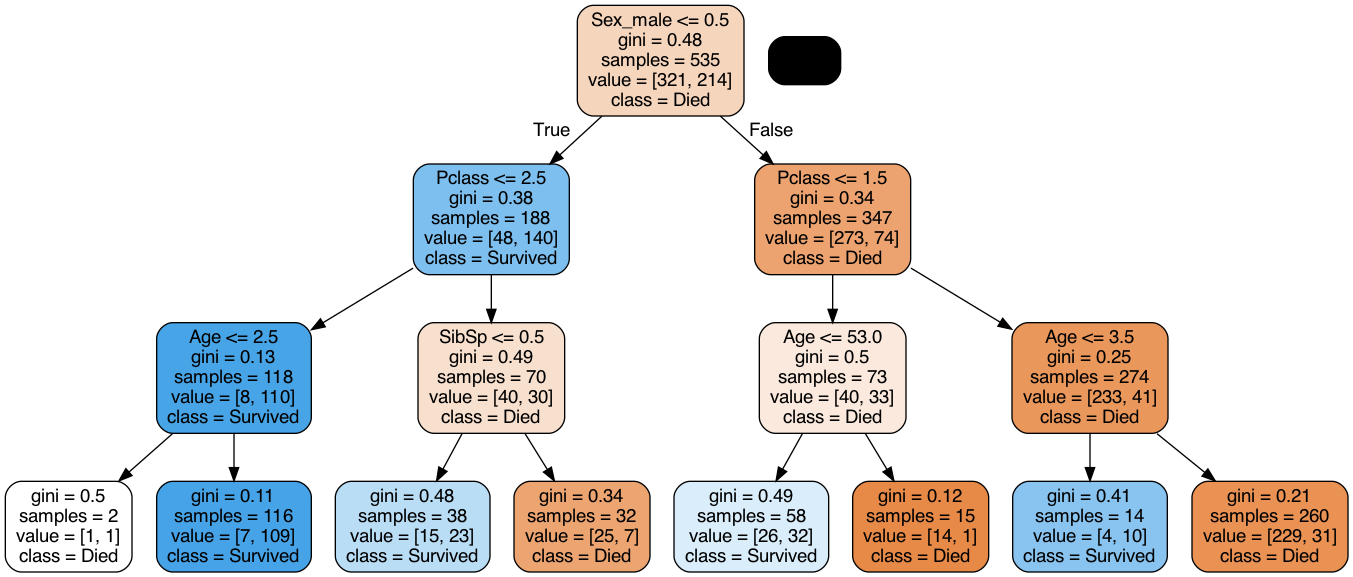

In [30]:
import pydotplus

pydot_graph = pydotplus.graph_from_dot_file("tree.dot")

from IPython.display import Image

Image(pydot_graph.create_png())

## Under- vs. overfitting with decision trees

Q5. Investigate the performance of decision trees for various depths of the tree. A flat tree might not be fitted to the data very well (underfit), while a very deep tree might be fitted to well to the data (overfitting). Fit the trees with depths of 2 to 11 and visualise the performance in training and test data. Use the accuracy score as measure for the performance.

In [31]:
train_score = []
test_score = []
depth = []
for d in range(2,12):
    dtree = tree.DecisionTreeClassifier(max_depth=d)
    dtree.fit(X_train, Y_train)
    Y_train_pred = dtree.predict(X_train)
    Y_test_pred = dtree.predict(X_test)
    train_score.append(accuracy_score(Y_train, Y_train_pred))
    test_score.append(accuracy_score(Y_test, Y_test_pred))
    depth.append(d)

In [32]:
z = pd.DataFrame(np.column_stack([depth, train_score, test_score]), columns = ['depth', 'train', 'test'])
z

,depth,train,test
0,2.0,0.790654,0.793296
1,3.0,0.828037,0.726257
2,4.0,0.856075,0.754190
3,5.0,0.869159,0.782123
4,6.0,0.895327,0.798883
5,7.0,0.906542,0.776536
6,8.0,0.917757,0.765363
7,9.0,0.919626,0.759777
8,10.0,0.936449,0.770950
9,11.0,0.947664,0.770950


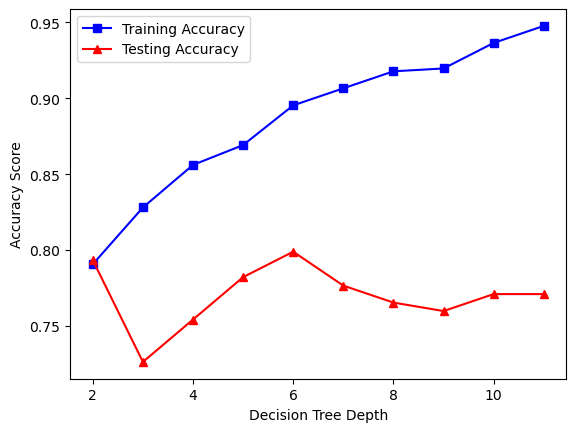

In [50]:
import matplotlib.pyplot as plt

# Assuming z.depth, z.train, and z.test are your data arrays
plt.plot(z.depth, z.train, 'bs-', label='Training Accuracy')
plt.plot(z.depth, z.test, 'r^-', label='Testing Accuracy')
plt.legend()
plt.xlabel("Decision Tree Depth")
plt.ylabel("Accuracy Score")
plt.savefig('decision_tree_fit.png')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


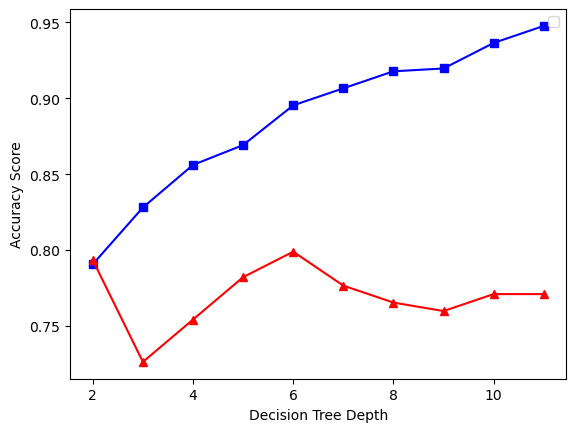

In [49]:
plt.plot(z.depth, z.train, 'bs-')
plt.plot(z.depth, z.test, 'r^-')
plt.legend()
plt.xlabel("Decision Tree Depth")
plt.ylabel("Accuracy Score")
plt.savefig('decison_tree_fit.png')

# 3. Fit and visualisation of a random forest

Q6. Fit a Random Forest Classifier and conduct model evaluation. Compute the confusion matrix, the accuracy score and the classification report and draw the ROC curve. Visualise the random forest.
Details at https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [34]:
# rf = RandomForestClassifier()

In [35]:
rf = RandomForestClassifier(bootstrap = True, class_weight = None, criterion = 'gini',
            max_depth = None, max_leaf_nodes = None,
            min_impurity_decrease = 0.0, 
            min_samples_leaf = 5, min_samples_split = 2,
            min_weight_fraction_leaf = 0.0, n_estimators = 100, n_jobs = 1,
            oob_score = False, random_state = None, verbose = 0,
            warm_start = False)

In [36]:
rf.fit(X_train, Y_train)

RandomForestClassifier(min_samples_leaf=5, n_jobs=1)

In [37]:
Y_pred = rf.predict(X_test)
from sklearn import metrics 
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
print(confusion_matrix)

[[85 18]
 [22 54]]


In [38]:
print(metrics.classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       103
           1       0.75      0.71      0.73        76

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



In [39]:
print(metrics.accuracy_score(Y_test, Y_pred))

0.776536312849162


Plotting the ROC:

In [40]:
prob = rf.predict_proba(X_test)

In [41]:
pred = prob[:,1]

In [42]:
fpr, tpr, threshold = metrics.roc_curve(Y_test, pred)

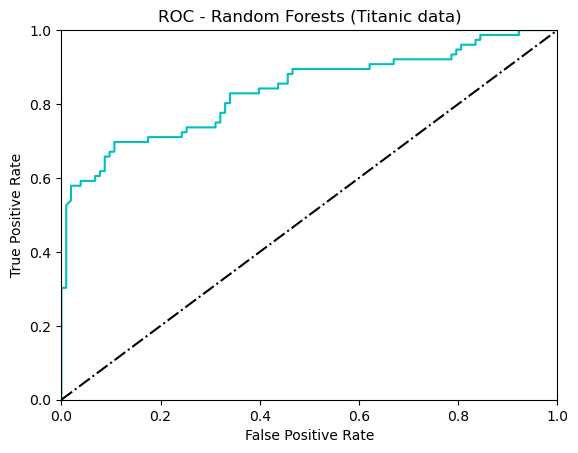

In [43]:
plt.title('ROC - Random Forests (Titanic data)')
plt.plot(fpr, tpr, 'c')
plt.plot([0, 1], [0, 1],'k-.')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [44]:
metrics.roc_auc_score(Y_test, pred)

0.8361650485436892

Visualisation of the random forest

In [45]:
tree = rf.estimators_[10]

In [46]:
export_graphviz(tree, out_file ='tree.dot', 
                feature_names = X_train.columns.values.tolist(),
                class_names = ['Died','Survived'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

In [47]:
pydot_graph = pydotplus.graph_from_dot_file("tree.dot")

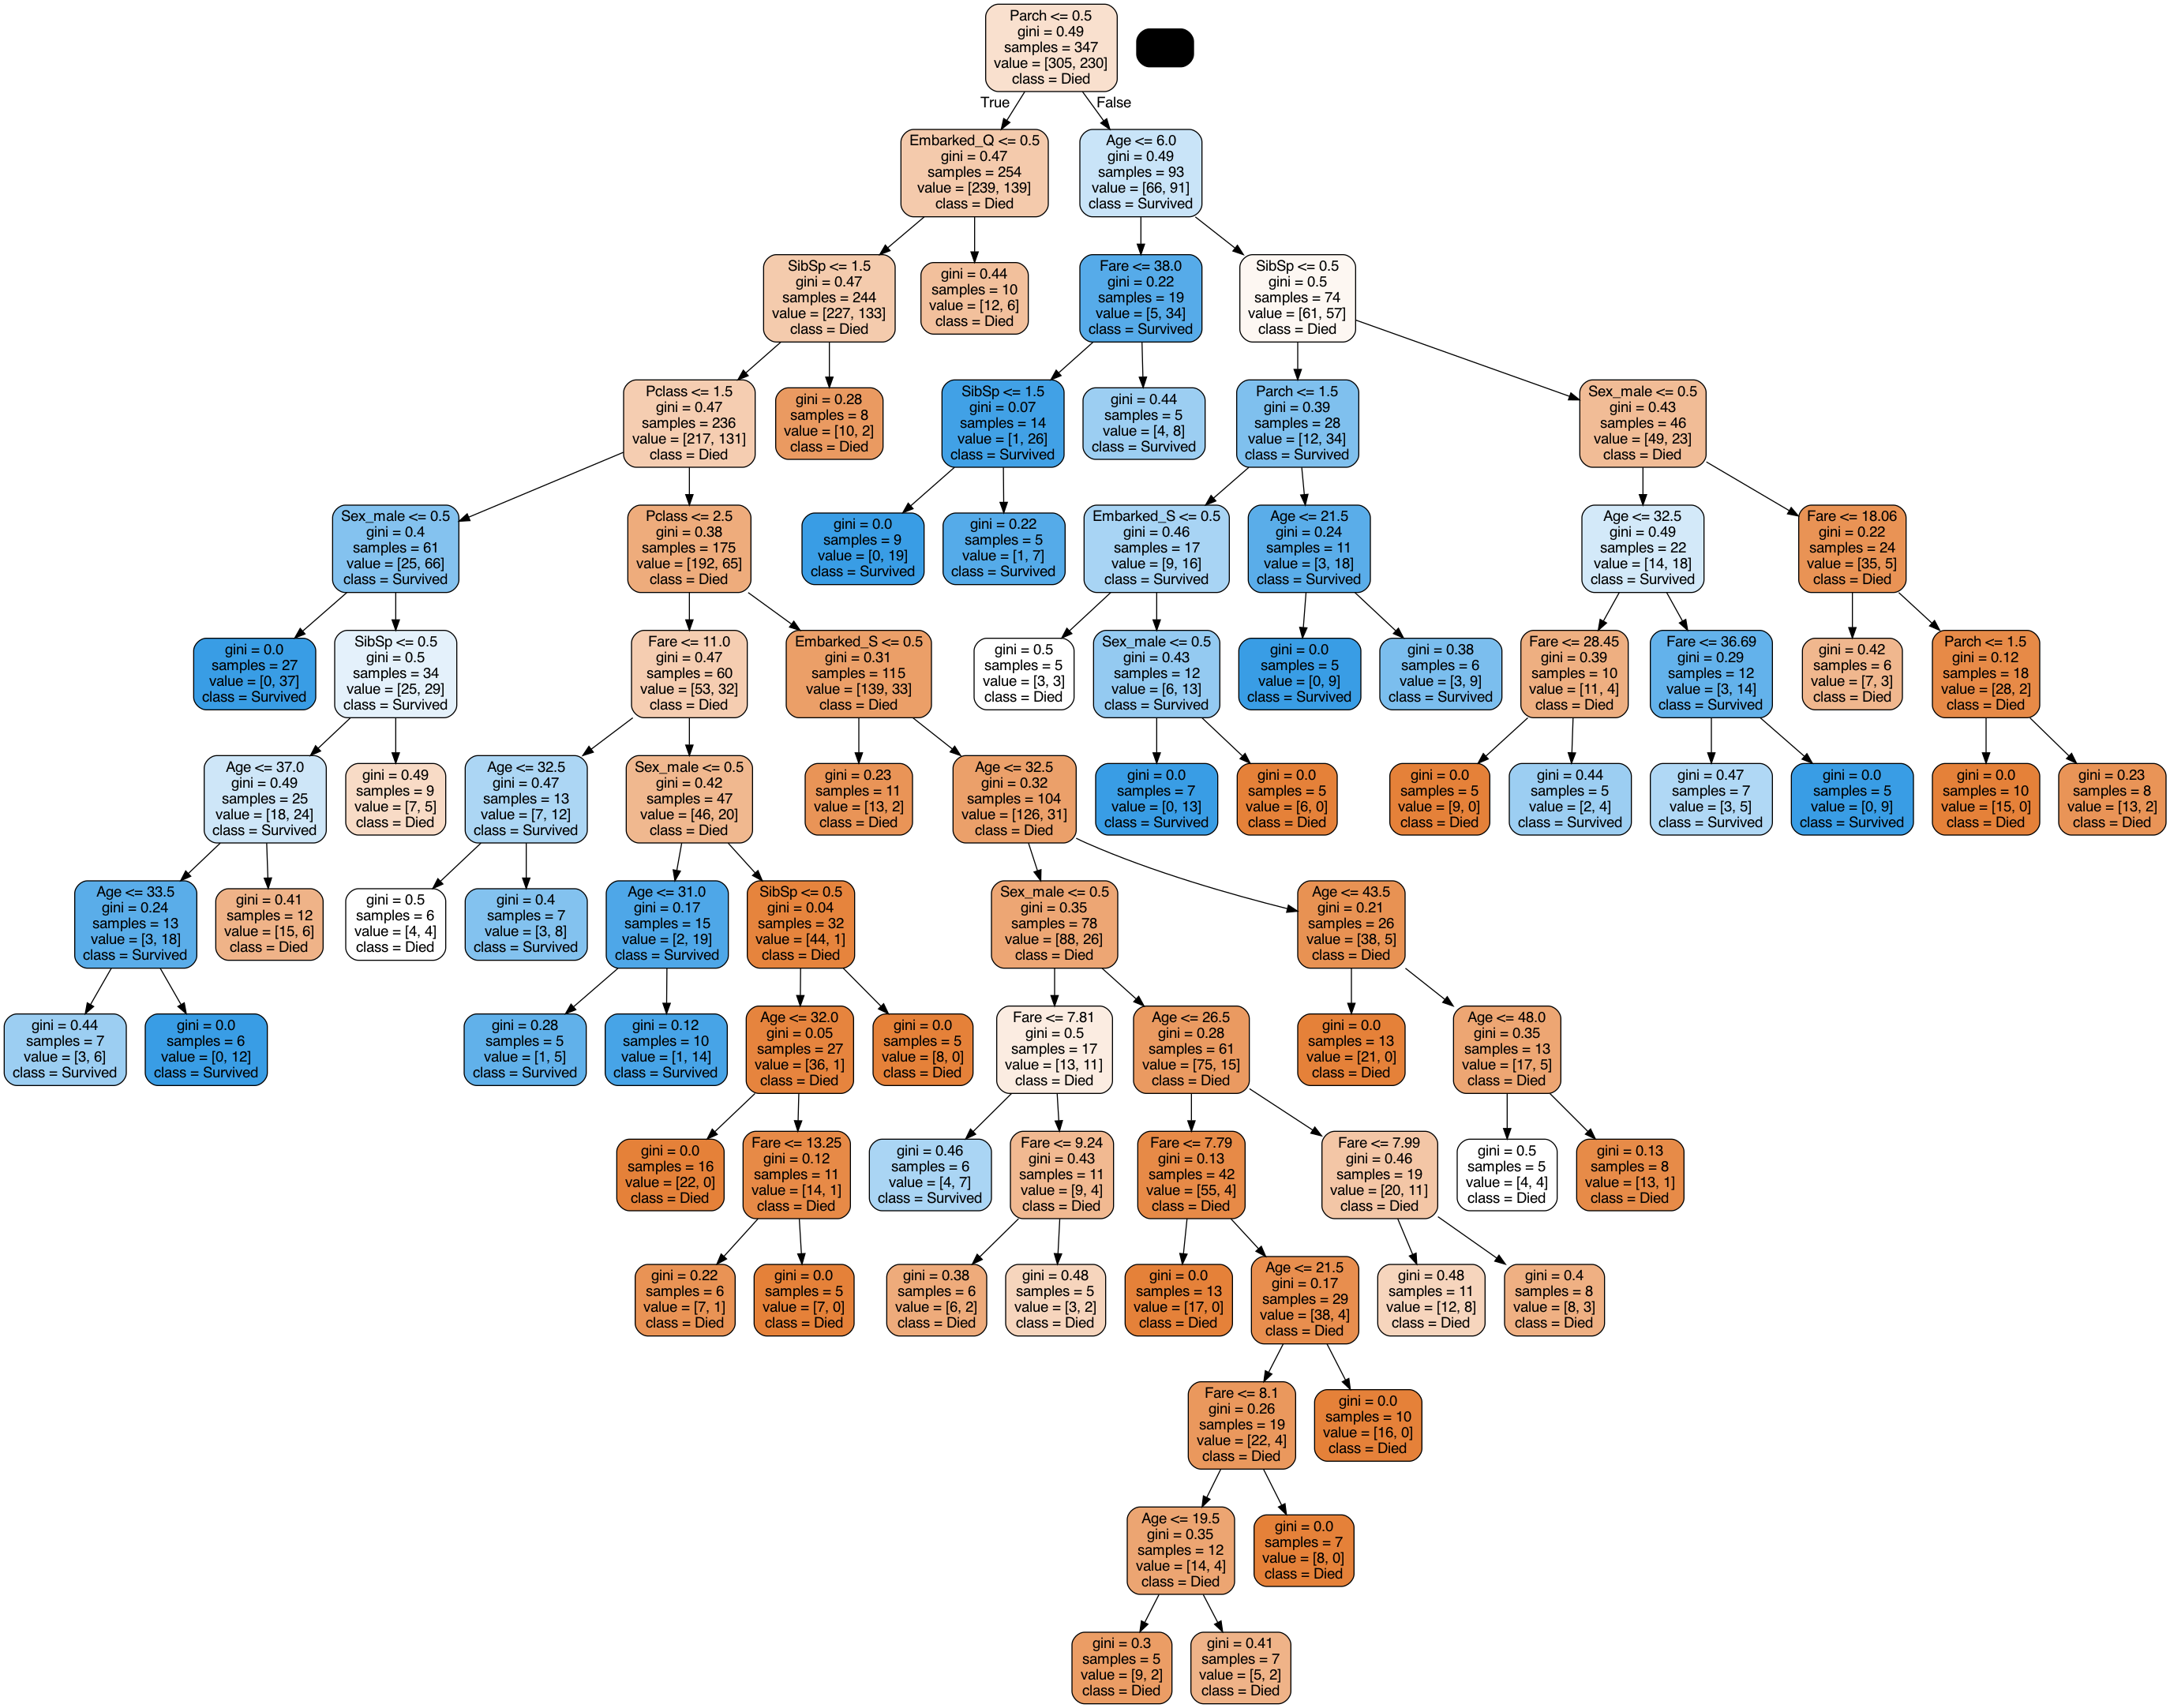

In [48]:
from IPython.display import Image

Image(pydot_graph.create_png())